In [1]:
from multiwire import *
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.stats import norm


In [2]:
T1='10-Mar-2022-00:00:00'
T2='10-Mar-2022-12:00:00'

df_8=get_multiwire_data(T1,T2)

T1='09-Mar-2022-14:00:00'
T2='10-Mar-2022-00:00:00'

df_1=get_multiwire_data(T1,T2)

In [3]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / 2 / stddev**2)

df=df_1
xVal=np.array([_x for _x in df.X.values])
yVal=np.array([_x for _x in df.Y.values])

a=[]
for i in range(len(xVal)):
    m=xVal[i].argmax()
    ydata=xVal[i,m-10:m+10]
    xdata=np.arange(m-10,m+10)
    parametersX, covariance = curve_fit(gaussian, xdata, ydata,p0=(2,m,5),bounds=((0,0,0),(10,50,50)))
    m=yVal[i].argmax()
    ydata=yVal[i,m-10:m+10]
    xdata=np.arange(m-10,m+10)
    parametersY, covariance = curve_fit(gaussian, xdata, ydata,p0=(2,m,5),bounds=((0,0,0),(10,50,50)))
    a.append([parametersX[2],parametersY[2],parametersX[2]/parametersY[2]])
a=np.array(a)

print('Average Sigma_X, Sigma_Y, and Ratio Sigma_X/Sigma_Y from 1 pulse spills')
print(a.mean(axis=0))

df=df_8
xVal=np.array([_x for _x in df.X.values])
yVal=np.array([_x for _x in df.Y.values])

a=[]
for i in range(len(xVal)):
    m=xVal[i].argmax()
    ydata=xVal[i,m-10:m+10]
    xdata=np.arange(m-10,m+10)
    parametersX, covariance = curve_fit(gaussian, xdata, ydata,p0=(2,m,5),bounds=((0,0,0),(10,50,50)))
    m=yVal[i].argmax()
    ydata=yVal[i,m-10:m+10]
    xdata=np.arange(m-10,m+10)
    parametersY, covariance = curve_fit(gaussian, xdata, ydata,p0=(2,m,5),bounds=((0,0,0),(10,50,50)))
    a.append([parametersX[2],parametersY[2],parametersX[2]/parametersY[2]])
a=np.array(a)

print('Average Sigma_X, Sigma_Y, and Ratio Sigma_X/Sigma_Y from 8 pulse spills')
print(a.mean(axis=0))



Average Sigma_X, Sigma_Y, and Ratio Sigma_X/Sigma_Y from 1 pulse spills
[2.63311932 1.17023846 2.24976138]
Average Sigma_X, Sigma_Y, and Ratio Sigma_X/Sigma_Y from 8 pulse spills
[2.67602574 1.13094816 2.36598575]


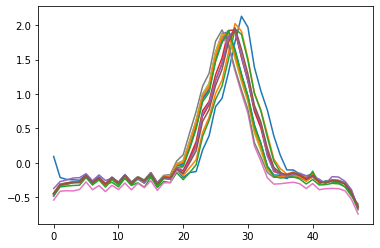

In [4]:
for x in df_8.X.values:
    plt.plot(x)

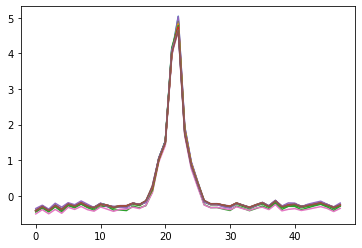

In [5]:
for y in df_8.Y.values:
    plt.plot(y)

Text(0.5, 0, 'Amplitude')

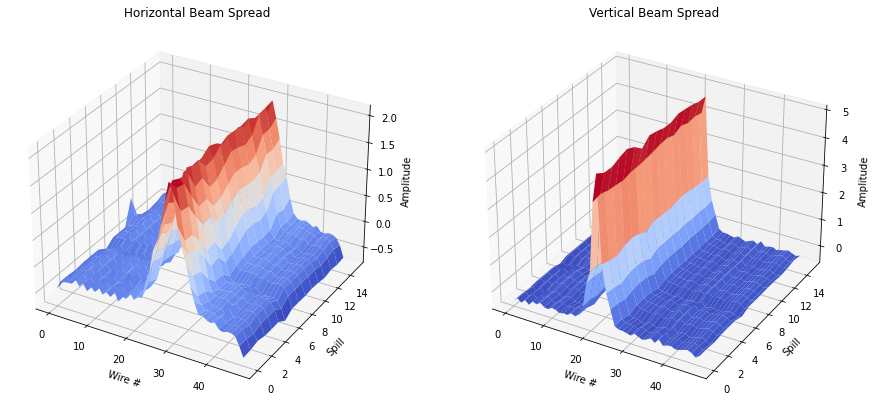

In [6]:
xVal=np.array([_x for _x in df_8.X.values])
yVal=np.array([_x for _x in df_8.Y.values])

_X,_Y=np.meshgrid(np.arange(48),np.arange(len(df_8)))
fig, ax = plt.subplots(1,2,figsize=(15,10),subplot_kw={"projection": "3d"})
ax[0].plot_surface(_X, _Y, xVal, cmap=cm.coolwarm)
ax[1].plot_surface(_X, _Y, yVal, cmap=cm.coolwarm)
ax[0].set_title('Horizontal Beam Spread')
ax[0].set_xlabel('Wire #')
ax[0].set_ylabel('Spill')
ax[0].set_zlabel('Amplitude')
ax[1].set_title('Vertical Beam Spread')
ax[1].set_xlabel('Wire #')
ax[1].set_ylabel('Spill')
ax[1].set_zlabel('Amplitude')


Text(0.5, 0, 'Amplitude')

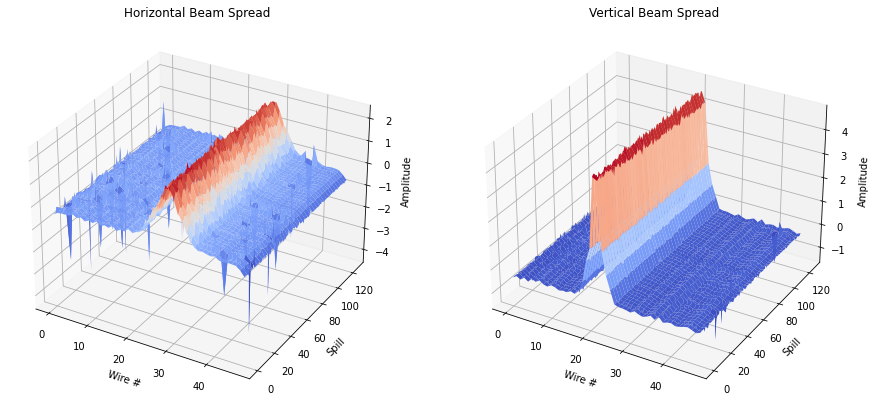

In [7]:
df_1.X.values
xVal=np.array([_x for _x in df_1.X.values])
yVal=np.array([_x for _x in df_1.Y.values])

_X,_Y=np.meshgrid(np.arange(48),np.arange(len(df_1)))
fig, ax = plt.subplots(1,2,figsize=(15,10),subplot_kw={"projection": "3d"})
ax[0].plot_surface(_X, _Y, xVal, cmap=cm.coolwarm)
ax[1].plot_surface(_X, _Y, yVal, cmap=cm.coolwarm)
ax[0].set_title('Horizontal Beam Spread')
ax[0].set_xlabel('Wire #')
ax[0].set_ylabel('Spill')
ax[0].set_zlabel('Amplitude')
ax[1].set_title('Vertical Beam Spread')
ax[1].set_xlabel('Wire #')
ax[1].set_ylabel('Spill')
ax[1].set_zlabel('Amplitude')


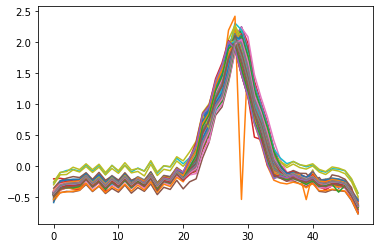

In [8]:
for x in df_1.X.values:
    if x.min()<-1: continue
    plt.plot(x)

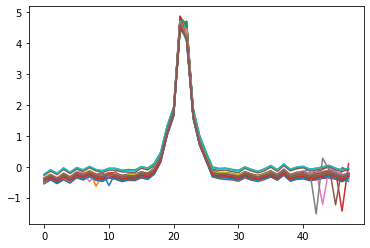

In [9]:
for y in df_1.Y.values:
    plt.plot(y)

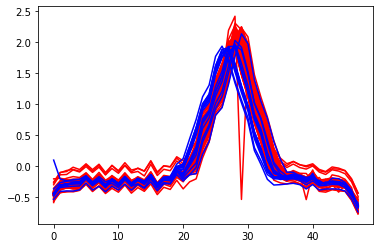

In [10]:
for x in df_1.X.values:
    if x.min()<-1: continue
    plt.plot(x,c='r')
    
for x in df_8.X.values:
    plt.plot(x,c='b')

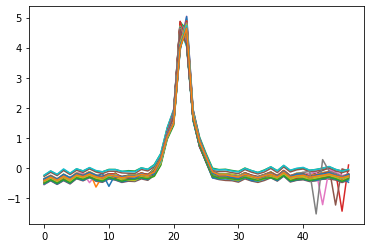

In [11]:
for y in df_1.Y.values:
    plt.plot(y)
    
for y in df_8.Y.values:
    plt.plot(y)